In [1]:
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#filter out ones not trading
is_trading = df.loc[df["IsTrading"] == True]
is_trading["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [4]:
df = is_trading.drop("IsTrading",axis=1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#drop n/a's
df = df.dropna(how="any")
df.value_counts()

Unnamed: 0  CoinName      Algorithm           ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin     X13                 PoW/PoS    2.927942e+10     314159265359       1
PROC        ProCurrency   SHA-256             PoS        1.005457e+08     75000000000        1
PNX         PhantomX      X11                 PoW/PoS    4.517421e+07     50000000           1
PNY         Peony Coin    Scrypt              PoS        1.042012e+06     16880000000        1
POA         Poa Network   Proof-of-Authority  PoA        2.044790e+08     252460800          1
                                                                                            ..
FJC         FujiCoin      Scrypt-n            PoW        0.000000e+00     10000000           1
FLAP        Flappy Coin   Scrypt              PoW        0.000000e+00     100000000000       1
FLDC        Folding Coin  Stanford Folding    PoW        7.194170e+08     1000000000         1
FLIP        BitFlip       Scrypt              PoW      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [7]:
#keep rows where the total coins mined is greater than zero
mined = df.loc[df["TotalCoinsMined"] > 0]
mined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [8]:
#drop the coin name column 
df=mined.drop("CoinName", axis=1)

In [9]:
#create dummy columns for Algorithm
df = pd.get_dummies(df, columns=['Algorithm'],drop_first=True)
df.shape

(532, 74)

In [10]:
df.head()

,Unnamed: 0,ProofType,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
0,42,PoW/PoS,4.199995e+01,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1337,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,BTC,PoW,1.792718e+07,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,PoW,1.076842e+08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = df.drop("Unnamed: 0", axis=1)
df

,ProofType,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
0,PoW/PoS,4.199995e+01,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,PoW,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PoW,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,DPoS,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,PoW/PoS,1.493105e+07,250000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,PoW,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,PoW,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#create dummy columns for ProofType
df = pd.get_dummies(df, columns=['ProofType'],drop_first=True)
df.shape

(532, 96)

In [13]:
df.dtypes

TotalCoinsMined                   float64
TotalCoinSupply                    object
Algorithm_536                       uint8
Algorithm_Argon2d                   uint8
Algorithm_BLAKE256                  uint8
                                   ...   
ProofType_Proof of Authority        uint8
ProofType_Proof of Trust            uint8
ProofType_TPoS                      uint8
ProofType_Zero-Knowledge Proof      uint8
ProofType_dPoW/PoW                  uint8
Length: 96, dtype: object

In [14]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.06142951 -0.07530656
  -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963  -0.19245009
  -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656 -0.0433963
  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963  -0.0433963
  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963  -0.13118084
  -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963  -0.07530656
  -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656 -0.15826614
  -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951  1.38675049
  -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.39879994
  -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883 -0.10680283
  -0.13118084 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.43911856 -0.0433963  -0.06142951 -0.

### Perform dimensionality reduction with PCA
Applying PCA to reduce dimensions and preserve 90% of explained variance

In [21]:
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=0.90)

df_pca = pca.fit_transform(df_scaled)



### Further reduce the dataset dimensions with t-SNE
In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. 
Then create a scatter plot of the t-SNE output.
Observe whether there are distinct clusters or not.

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)


# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

# Check the shape
tsne_features.shape

(532, 2)

In [23]:
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

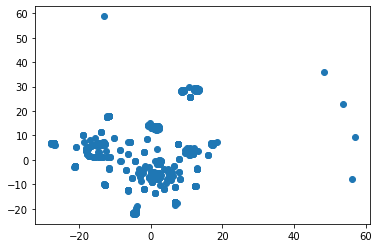

In [24]:
# Visualize the clusters
plt.scatter(x,y)
plt.show()




### Cluster Analysis with k-Means
Create an elbow plot to identify the best number of clusters. 
Use a for-loop to determine the inertia for each `k` between 1 through 10. 
Determine where the elbow of the plot is, and at which value of `k` it appears.

In [25]:
from sklearn.cluster import KMeans
#Create an elbow plot to identify the best number of clusters. 

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()




C:\Users\amyph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46445.752170
1,2,45376.536552
2,3,44121.613823
3,4,43242.958279
4,5,42503.413735


### Elbow Curve

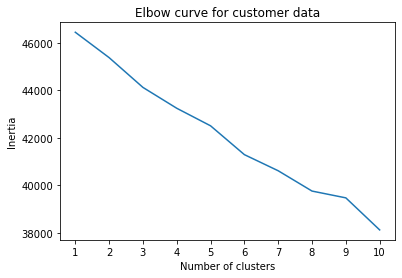

In [26]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()


Using K-means did not show an "elbow" type bend. When this happens you should either 1) tune your algorithm, 
2) Or use another algorithm. 3) or do data preprocessing.
